<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Spring2024/blob/main/Module%202/8_NumericalDerivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

February 17, 2024

This notebook was adapted from notebooks by Prof. Volodymir Vovchenko as a part of his course Computational Physics course (PHYS 6350), available on GitHub as https://github.com/vlvovch/PHYS6350-ComputationalPhysics

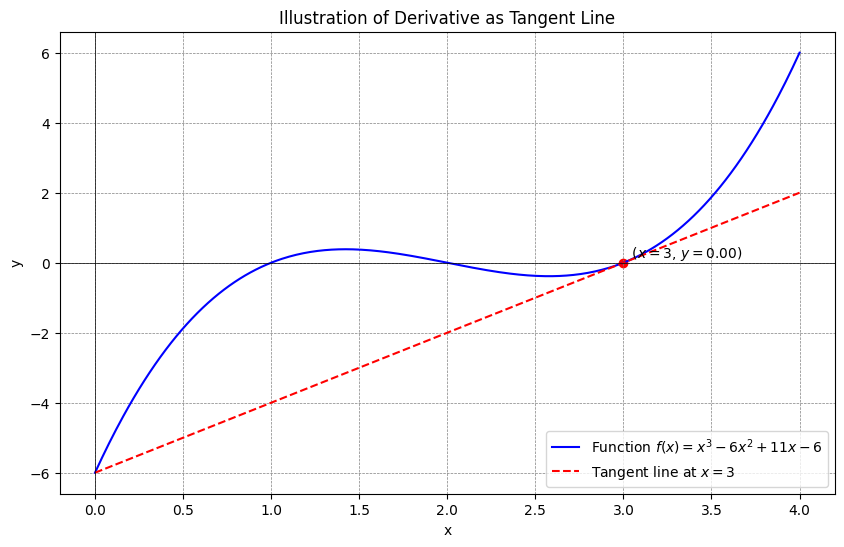

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the polynomial function
def poly_function(x):
    # Example polynomial: f(x) = x^3 - 6x^2 + 11x - 6
    return x**3 - 6*x**2 + 11*x - 6

# Derivative of the polynomial function
def derivative_poly_function(x):
    # Derivative: f'(x) = 3x^2 - 12x + 11
    return 3*x**2 - 12*x + 11

# Function to calculate the tangent line at a given x value
def tangent_line(x, x_tangent):
    y_tangent = poly_function(x_tangent)
    slope = derivative_poly_function(x_tangent)
    return slope * (x - x_tangent) + y_tangent

# Generate x values
x = np.linspace(0, 4, 400)

# Choose a point to draw the tangent line
x_tangent = 3  # For demonstration, you can change this value

# Calculate y values for the function and the tangent line
y = poly_function(x)
y_tangent_line = tangent_line(x, x_tangent)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the original function
plt.plot(x, y, label='Function $f(x) = x^3 - 6x^2 + 11x - 6$', color='blue')

# Plot the tangent line at x_tangent
plt.plot(x, y_tangent_line, label=f'Tangent line at $x = {x_tangent}$', linestyle='--', color='red')

# Mark the point of tangency
plt.scatter([x_tangent], [poly_function(x_tangent)], color='red')
plt.text(x_tangent, poly_function(x_tangent), f'  ($x = {x_tangent}$, $y = {poly_function(x_tangent):.2f}$)', verticalalignment='bottom')

plt.title('Illustration of Derivative as Tangent Line')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


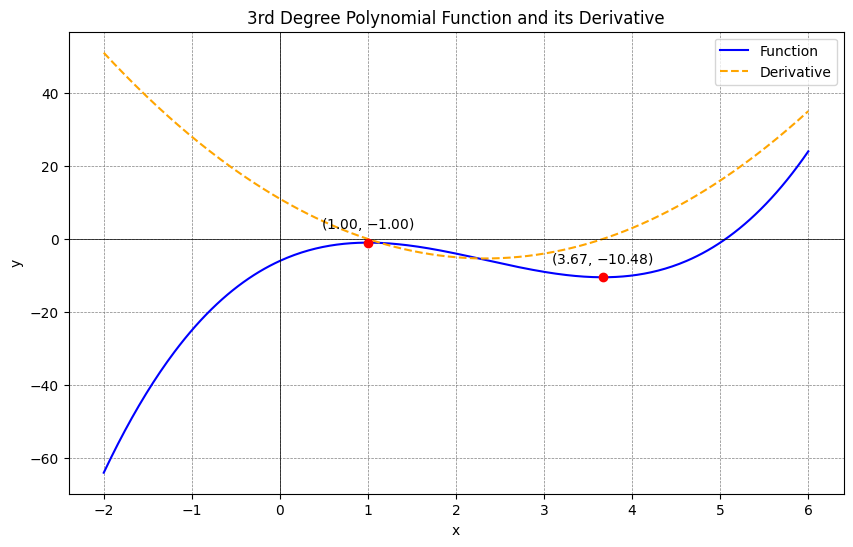

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the polynomial function and its derivative
def poly_function(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

def derivative_poly_function(x, a, b, c):
    return 3*a*x**2 + 2*b*x + c

# Coefficients for the polynomial (example: f(x) = x^3 - 6x^2 + 11x - 6)
a, b, c, d = 1, -7, 11, -6

# Generate x values
x = np.linspace(-2, 6, 400)

# Calculate y values for the function and its derivative
y = poly_function(x, a, b, c, d)
dy = derivative_poly_function(x, a, b, c)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the original function
plt.plot(x, y, label='Function', color='blue')

# Plot the derivative of the function
plt.plot(x, dy, label="Derivative", linestyle='--', color='orange')

# Marking the critical points (where the derivative is zero)
critical_points_x = np.roots([3*a, 2*b, c])
critical_points_y = poly_function(critical_points_x, a, b, c, d)
plt.scatter(critical_points_x, critical_points_y, color='red', zorder=5)

# Annotations for critical points
for (i, j) in zip(critical_points_x, critical_points_y):
    plt.annotate(f'(${i:.2f}$, ${j:.2f}$)', (i, j), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('3rd Degree Polynomial Function and its Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


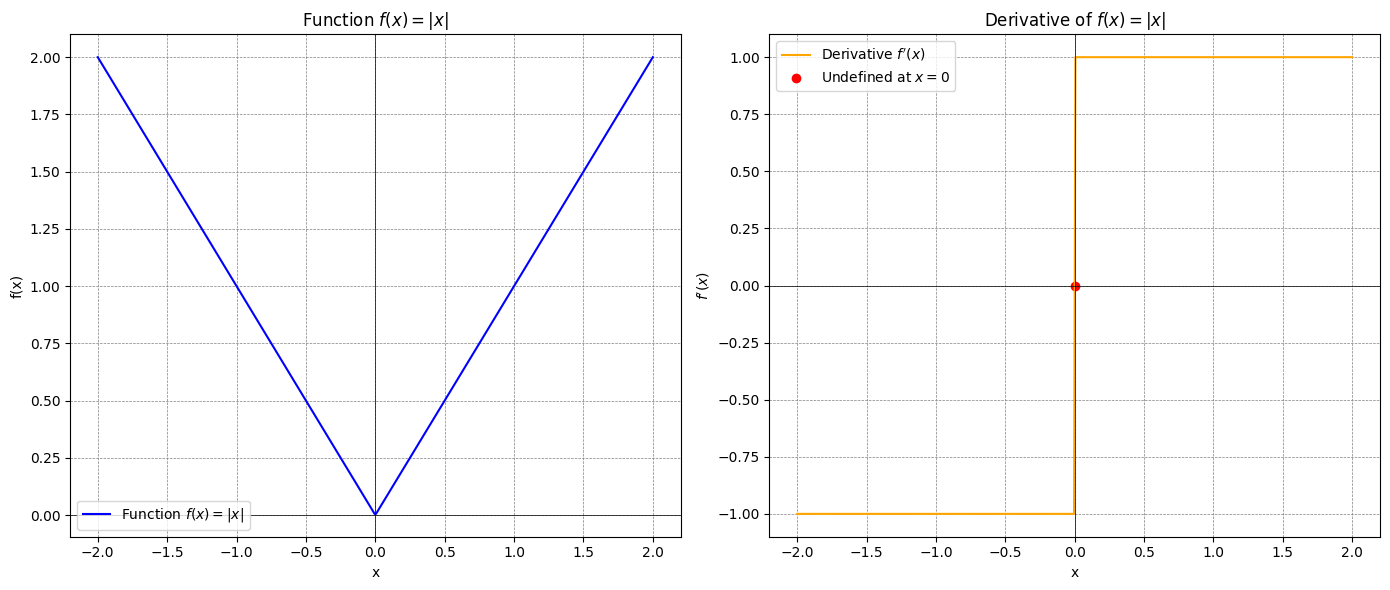

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the absolute value function
def abs_function(x):
    return np.abs(x)

# Define the derivative of the absolute value function as a piecewise function
def derivative_abs_function(x):
    return np.piecewise(x, [x < 0, x > 0], [-1, 1])

# Generate x values around the non-differentiable point
x = np.linspace(-2, 2, 400)
# Calculate y values for the function and its derivative
y = abs_function(x)
dy = derivative_abs_function(x)

# Plotting
plt.figure(figsize=(14, 6))
# Plot the original function
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Function $f(x) = |x|$', color='blue')
plt.title('Function $f(x) = |x|$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

# Plot the derivative of the function
plt.subplot(1, 2, 2)
plt.plot(x, dy, label="Derivative $f'(x)$", color='orange')
plt.scatter(0, 0, color='red', label='Undefined at $x=0$') # Highlight the non-differentiable point
plt.title("Derivative of $f(x) = |x|$")
plt.xlabel('x')
plt.ylabel("$f'(x)$")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.tight_layout()
plt.show()

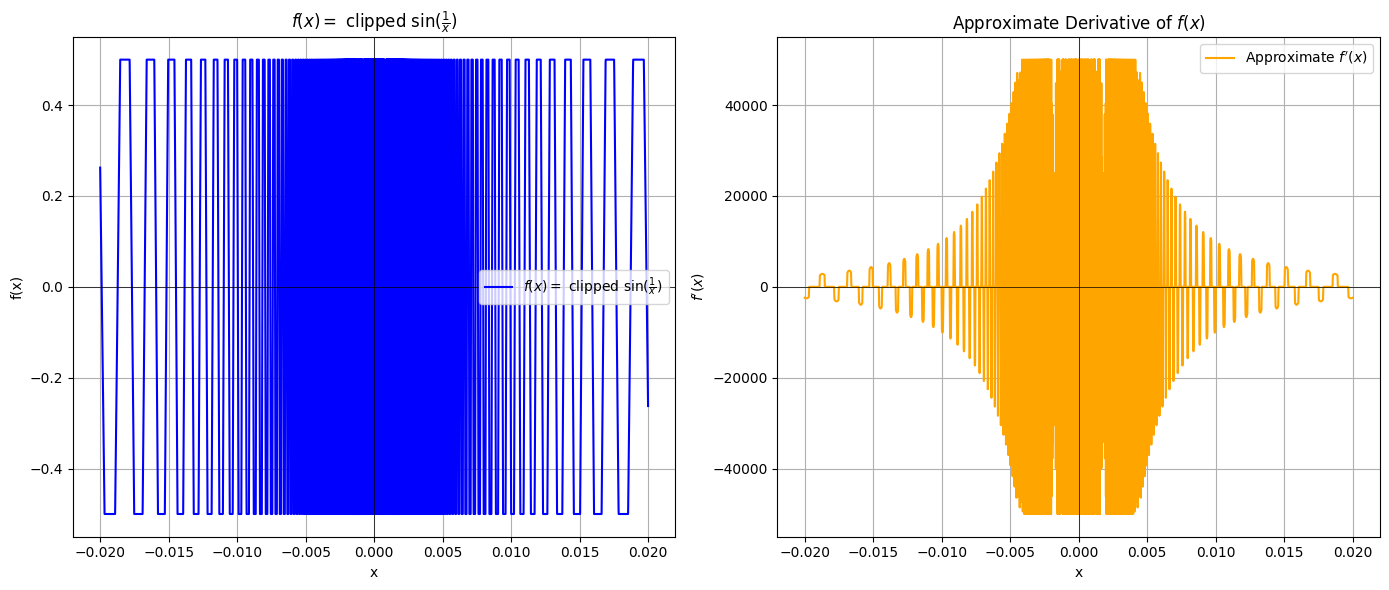

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the clipped sin(1/x) function
def clipped_sin_1_over_x(x):
    y = np.sin(1 / x)
    return np.where(np.abs(y) > 0.5, np.sign(y) * 0.5, y)  # Clip values to be within [-0.5, 0.5]

# Approximate derivative of the clipped function
def approximate_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

# Generate x values, avoiding zero
x = np.linspace(-0.02, 0.02, 10000)
x = x[x != 0]  # Remove zero to avoid division by zero

# Calculate y values for the function
y = clipped_sin_1_over_x(x)

# Calculate approximate y values for the derivative
dy = approximate_derivative(clipped_sin_1_over_x, x)

# Plotting
plt.figure(figsize=(14, 6))

# Plot the original function
plt.subplot(1, 2, 1)
plt.plot(x, y, label='$f(x) = $ clipped $\\sin(\\frac{1}{x})$', color='blue')
plt.title('$f(x) = $ clipped $\\sin(\\frac{1}{x})$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()

# Plot the approximate derivative of the function
plt.subplot(1, 2, 2)
plt.plot(x, dy, label="Approximate $f'(x)$", color='orange')
plt.title("Approximate Derivative of $f(x)$")
plt.xlabel('x')
plt.ylabel("$f'(x)$")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Numerical Derivatives

The numerical derivatives like
$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}~.
$$

Are evaluated using finite differences

The simplest methods are

## Forward difference
$$
f'(x) \simeq \frac{f(x+h) - f(x)}{h}~.
$$

The truncation error can be estimated through the Taylor theorem
$$
R_{\rm forw} = -\frac{1}{2}h f''(x) + \mathcal{O}(h^2)
$$

## Backward difference
$$
f'(x) \simeq \frac{f(x) - f(x-h)}{h}~.
$$

The truncation error:
$$
R_{\rm back} = \frac{1}{2}h f''(x) + \mathcal{O}(h^2)
$$

## Central difference

Take the average of forward and backward differences to cancel out the $\mathcal{O}(h)$ term in the error estimate:

$$
f'(x) \simeq \frac{f(x+h) - f(x-h)}{2h}~.
$$

The truncation error:
$$
R_{\rm cent} = -\frac{1}{6}h^2 f'''(x) + \mathcal{O}(h^3)
$$

In [5]:
def df_forward(f,x,h):
    return (f(x+h) - f(x)) / h

def df_backward(f,x,h):
    return (f(x) - f(x-h)) / h

def df_central(f,x,h):
    return (f(x+h) - f(x-h)) / (2. * h)

In [6]:
import numpy as np

# def f(x):
#     return x*(x-1.)*(x-2.)*(x-3.)*(x-4.)
#     #return 1./(1+25.*x**2)

# def df(x):
#     return (x-1.)*(x-2.)*(x-3.)*(x-4.) + x*(x-2.)*(x-3)*(x-4.) + x*(x-1.)*(x-3)*(x-4.) + x*(x-1.)*(x-2.)*(x-4.) + x*(x-1.)*(x-2.)*(x-3.)
#     #return -50.*x/(1+25.*x**2)**2

def f(x):
    return np.exp(x)

def df(x):
    return np.exp(x)

def d2f(x):
    return np.exp(x)

def d3f(x):
    return np.exp(x)

def d4f(x):
    return np.exp(x)

def d5f(x):
    return np.exp(x)

In [7]:
print("{:<10} {:<20} {:<20}".format('h',"f'(0)","Relative error"))
x0 = 0.

arr_h = []
arr_df = []
arr_err = []
arr_err_theo = []

for i in range(0,-20,-1):
    h = 10**i
    df_val = df_forward(f, x0,h)
    df_err = abs((df_val - df(x0)) / df(x0))
    print("{:<10} {:<20} {:<20}".format(h,df_val,df_err))
    arr_h.append(h)
    arr_df.append(df_val)
    arr_err.append(df_err)
    df_err_theo = abs(0.5*h*d2f(x0)/df(x0))
    arr_err_theo.append(df_err_theo)

arr_df_forw = arr_df[:]
arr_err_forw = arr_err[:]
arr_err_theo_forw = arr_err_theo[:]

h          f'(0)                Relative error      
1          1.718281828459045    0.7182818284590451  
0.1        1.0517091807564771   0.051709180756477124
0.01       1.005016708416795    0.005016708416794913
0.001      1.0005001667083846   0.0005001667083845973
0.0001     1.000050001667141    5.0001667140975314e-05
1e-05      1.000005000006965    5.000006964905879e-06
1e-06      1.0000004999621837   4.999621836532242e-07
1e-07      1.0000000494336803   4.943368026033568e-08
1e-08      0.999999993922529    6.07747097092215e-09
1e-09      1.000000082740371    8.274037099909037e-08
1e-10      1.000000082740371    8.274037099909037e-08
1e-11      1.000000082740371    8.274037099909037e-08
1e-12      1.000088900582341    8.890058234101161e-05
1e-13      0.9992007221626409   0.0007992778373591136
1e-14      0.9992007221626409   0.0007992778373591136
1e-15      1.1102230246251565   0.11022302462515654 
1e-16      0.0                  1.0                 
1e-17      0.0                  1.

In [8]:
print("{:<10} {:<20} {:<20}".format('h',"f'(0)","Relative error"))

arr_h = []
arr_df = []
arr_err = []
arr_err_theo = []

for i in range(0,-20,-1):
    h = 10**i
    df_val = df_backward(f, x0,h)
    df_err = abs((df_val - df(x0)) / df(x0))
    print("{:<10} {:<20} {:<20}".format(h,df_val,df_err))
    arr_h.append(h)
    arr_df.append(df_val)
    arr_err.append(df_err)
    df_err_theo = abs(0.5*h*d2f(x0)/df(x0))
    arr_err_theo.append(df_err_theo)

arr_df_back = arr_df[:]
arr_err_back = arr_err[:]
arr_err_theo_back = arr_err_theo[:]

h          f'(0)                Relative error      
1          0.6321205588285577   0.36787944117144233 
0.1        0.9516258196404048   0.048374180359595176
0.01       0.9950166250831893   0.004983374916810668
0.001      0.9995001666249781   0.0004998333750219075
0.0001     0.9999500016666385   4.999833336150061e-05
1e-05      0.9999950000172396   4.999982760378607e-06
1e-06      0.9999994999843054   5.000156946266543e-07
1e-07      0.999999949513608    5.048639195592841e-08
1e-08      0.999999993922529    6.07747097092215e-09
1e-09      0.9999999717180684   2.8281931574447583e-08
1e-10      1.000000082740371    8.274037099909037e-08
1e-11      1.000000082740371    8.274037099909037e-08
1e-12      0.9999778782798785   2.212172012150404e-05
1e-13      1.000310945187266    0.0003109451872660429
1e-14      0.9992007221626409   0.0007992778373591136
1e-15      0.9992007221626408   0.0007992778373592246
1e-16      1.1102230246251565   0.11022302462515654 
1e-17      0.0                  1

In [9]:
print("{:<10} {:<20} {:<20}".format('h',"f'(0)","Relative error"))

arr_h = []
arr_df = []
arr_err = []
arr_err_theo = []

for i in range(0,-20,-1):
    h = 10**i
    df_val = df_central(f, x0,h)
    df_err = abs((df_val - df(x0)) / df(x0))
    print("{:<10} {:<20} {:<20}".format(h,df_val,df_err))
    arr_h.append(h)
    arr_df.append(df_val)
    arr_err.append(df_err)
    df_err_theo = abs(h**2 * d3f(x0)/df(x0)/6.)
    arr_err_theo.append(df_err_theo)

arr_df_cent = arr_df[:]
arr_err_cent = arr_err[:]
arr_err_theo_cent = arr_err_theo[:]

h          f'(0)                Relative error      
1          1.1752011936438014   0.17520119364380138 
0.1        1.001667500198441    0.0016675001984409743
0.01       1.0000166667499921   1.6666749992122476e-05
0.001      1.0000001666666813   1.6666668134490692e-07
0.0001     1.0000000016668897   1.6668897373506297e-09
1e-05      1.0000000000121023   1.2102319146833906e-11
1e-06      0.9999999999732445   2.6755486715046572e-11
1e-07      0.9999999994736442   5.26355847796367e-10
1e-08      0.999999993922529    6.07747097092215e-09
1e-09      1.0000000272292198   2.7229219767832546e-08
1e-10      1.000000082740371    8.274037099909037e-08
1e-11      1.000000082740371    8.274037099909037e-08
1e-12      1.0000333894311098   3.3389431109753787e-05
1e-13      0.9997558336749535   0.00024416632504653535
1e-14      0.9992007221626409   0.0007992778373591136
1e-15      1.0547118733938987   0.05471187339389871 
1e-16      0.5551115123125783   0.44488848768742173 
1e-17      0.0            

To improve the approximation error use more than two function evaluations, e.g.
$$
f'(x) \simeq \frac{A f(x+2h) + B f(x+h) + C f(x) + D f(x-h) + E f(x-2h)}{h} + \mathcal{O}(h^4)
$$

Determine $A,B,C,D,E$ from from Taylor expansion of $f(x)$:
$$
f'(x) \simeq \frac{-f(x+2h)+8f(x+h)-8f(x-h)+f(x-2h)}{12h} + \frac{h^4}{30} f^{(5)} (x)
$$

In [10]:
def df_central2(f,x,h):
    return (-f(x+2.*h) + 8. * f(x+h) - 8. * f(x-h) + f(x - 2.*h)) / (12. * h)

In [11]:
print("{:<10} {:<20} {:<20}".format('h',"f'(0)","Relative error"))

arr_h = []
arr_df = []
arr_err = []
arr_err_theo = []

for i in range(0,-20,-1):
    h = 10**i
    df_val = df_central2(f, x0,h)
    df_err = abs((df_val - df(x0)) / df(x0))
    print("{:<10} {:<20} {:<20}".format(h,df_val,df_err))
    arr_h.append(h)
    arr_df.append(df_val)
    arr_err.append(df_err)
    df_err_theo = abs(h**4 * d5f(x0)/df(x0)/30.)
    arr_err_theo.append(df_err_theo)

arr_df_cent2 = arr_df[:]
arr_err_cent2 = arr_err[:]
arr_err_theo_cent2 = arr_err_theo[:]

h          f'(0)                Relative error      
1          0.962458190217232    0.037541809782768   
0.1        0.9999966626960979   3.3373039021178386e-06
0.01       0.9999999996666555   3.3334446314370325e-10
0.001      0.9999999999999546   4.54081217071689e-14
0.0001     1.0000000000002598   2.5979218776228663e-13
1e-05      0.999999999996374    3.6259883984257613e-12
1e-06      0.9999999999269852   7.301481641519558e-11
1e-07      0.9999999991960884   8.039116039526562e-10
1e-08      0.9999999948477147   5.152285265097589e-09
1e-09      1.0000000272292195   2.722921954578794e-08
1e-10      1.000000082740371    8.274037099909037e-08
1e-11      1.000000082740371    8.274037099909037e-08
1e-12      1.0000333894311098   3.3389431109753787e-05
1e-13      0.9998483522603387   0.00015164773966125367
1e-14      1.0029014655780581   0.002901465578058149
1e-15      1.0917193075480705   0.09171930754807045 
1e-16      0.5551115123125783   0.44488848768742173 
1e-17      0.0              

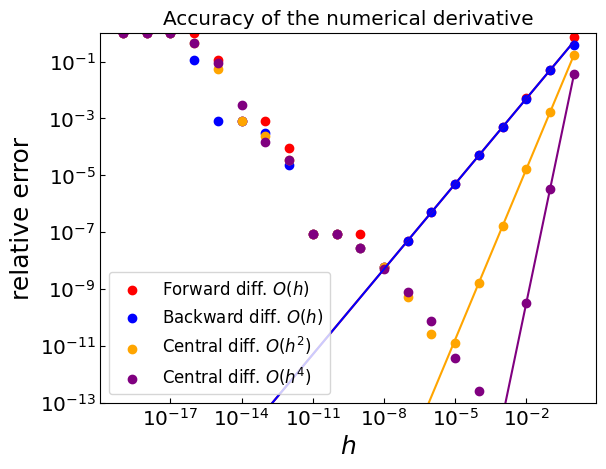

In [12]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.title("Accuracy of the numerical derivative")
plt.xlabel("${h}$", fontsize=18)
plt.ylabel("relative error", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-13,1.)
plt.scatter(arr_h, arr_err_forw, color="red",label="Forward diff. ${O(h)}$")
plt.plot(arr_h, arr_err_theo_forw, color="red")
plt.scatter(arr_h, arr_err_back, color="blue",label="Backward diff. ${O(h)}$")
plt.plot(arr_h, arr_err_theo_back, color="blue")
plt.scatter(arr_h, arr_err_cent, color="orange",label="Central diff. ${O(h^2)}$")
plt.plot(arr_h, arr_err_theo_cent, color="orange")
plt.scatter(arr_h, arr_err_cent2, color="purple",label="Central diff. ${O(h^4)}$")
plt.plot(arr_h, arr_err_theo_cent2, color="purple")

plt.legend()
plt.show()

## High-order derivatives

Central difference for the 2nd derivative
$$
f''(x) \simeq \frac{f'(x+h/2) - f'(x-h/2)}{h}
$$

Apply the central difference again to $f'(x+h/2)$ and $f'(x-h/2)$:
$$
f''(x) \simeq \frac{f(x+h) - 2f(x) - f(x-h)}{h^2}
$$

The truncation error:
$$
R_{f''_{\rm cent}(x)} = -\frac{1}{12} h^2 f^{(4)}(x)
$$

In [13]:
def d2f_central(f,x,h):
    return (f(x+h) - 2*f(x) + f(x-h)) / (h**2)

In [14]:
print("{:<10} {:<20} {:<20}".format('h',"f''(0)","Relative error"))

arr_h = []
arr_d2f = []
arr_err = []

for i in range(0,-20,-1):
    h = 10**i
    d2f_val = d2f_central(f, x0,h)
    d2f_err = abs((d2f_val - d2f(x0)) / d2f(x0))
    print("{:<10} {:<20} {:<20}".format(h,d2f_val,d2f_err))
    arr_h.append(h)
    arr_d2f.append(d2f_val)
    arr_err.append(d2f_err)

arr_d2f_cent = arr_df[:]
arr_errd2f_cent = arr_err[:]

h          f''(0)               Relative error      
1          1.0861612696304874   0.08616126963048742 
0.1        1.0008336111607228   0.0008336111607227803
0.01       1.000008333360558    8.333360558054892e-06
0.001      1.0000000834065048   8.340650481386547e-08
0.0001     1.0000000050247593   5.024759275329416e-09
1e-05      0.9999989725173463   1.0274826537370885e-06
1e-06      0.9999778782798785   2.212172012150404e-05
1e-07      0.999200722162641    0.0007992778373590026
1e-08      0.0                  1.0                 
1e-09      111.02230246251564   110.02230246251564  
1e-10      0.0                  1.0                 
1e-11      0.0                  1.0                 
1e-12      111022302.46251567   111022301.46251567  
1e-13      -11102230246.251564  11102230247.251564  
1e-14      0.0                  1.0                 
1e-15      111022302462515.64   111022302462514.64  
1e-16      -1.1102230246251566e+16 1.1102230246251568e+16
1e-17      0.0                  1

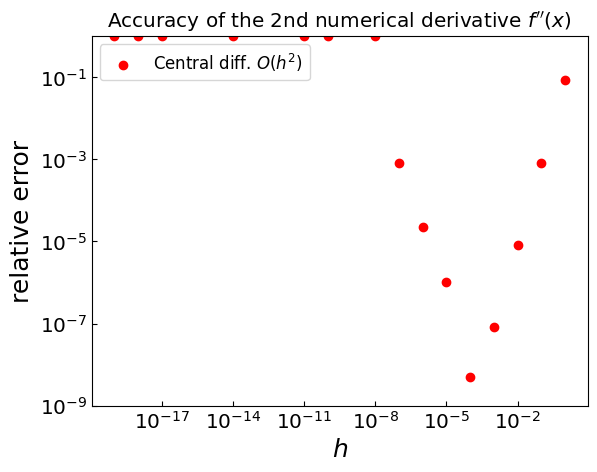

In [15]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.title("Accuracy of the 2nd numerical derivative ${f''(x)}$")
plt.xlabel("${h}$", fontsize=18)
plt.ylabel("relative error", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-9,1.)
plt.scatter(arr_h, arr_errd2f_cent, color="red",label="Central diff. ${O(h^2)}$")

plt.legend()
plt.show()